<a href="https://colab.research.google.com/github/alexD1990/Data_engineering/blob/main/equity_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latest version without function

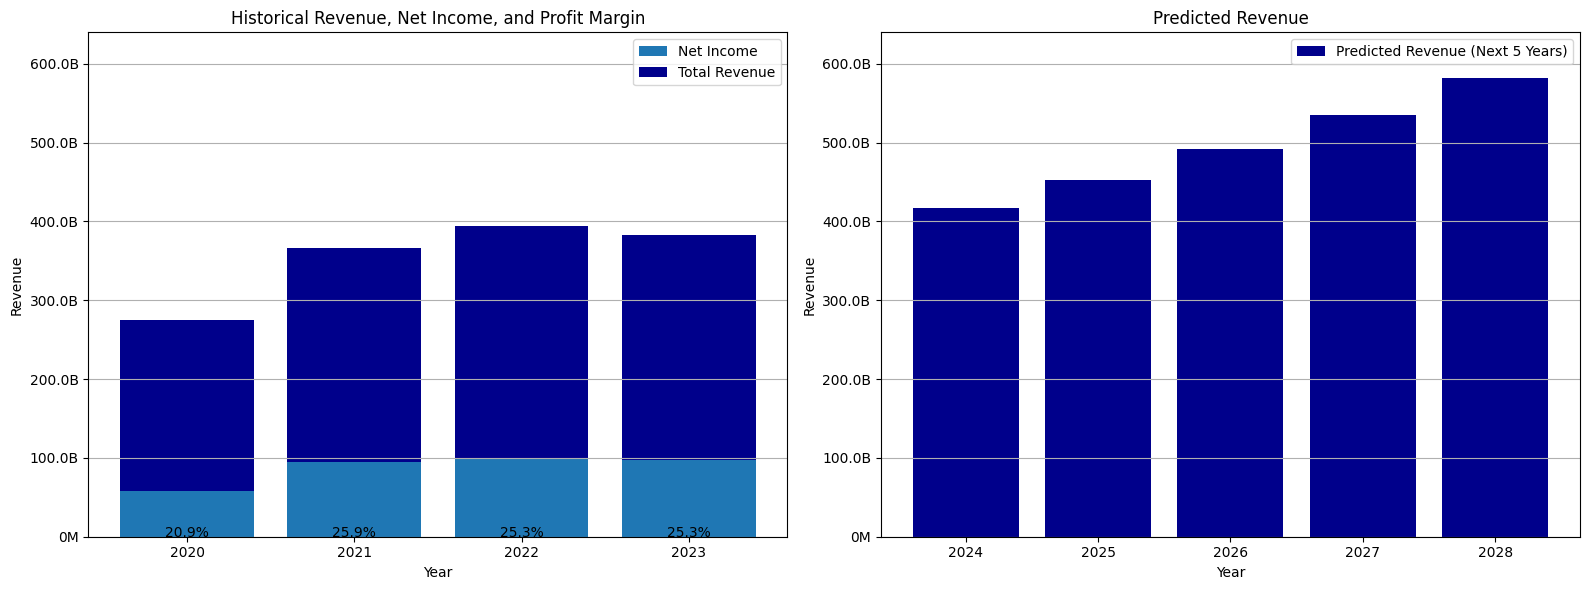

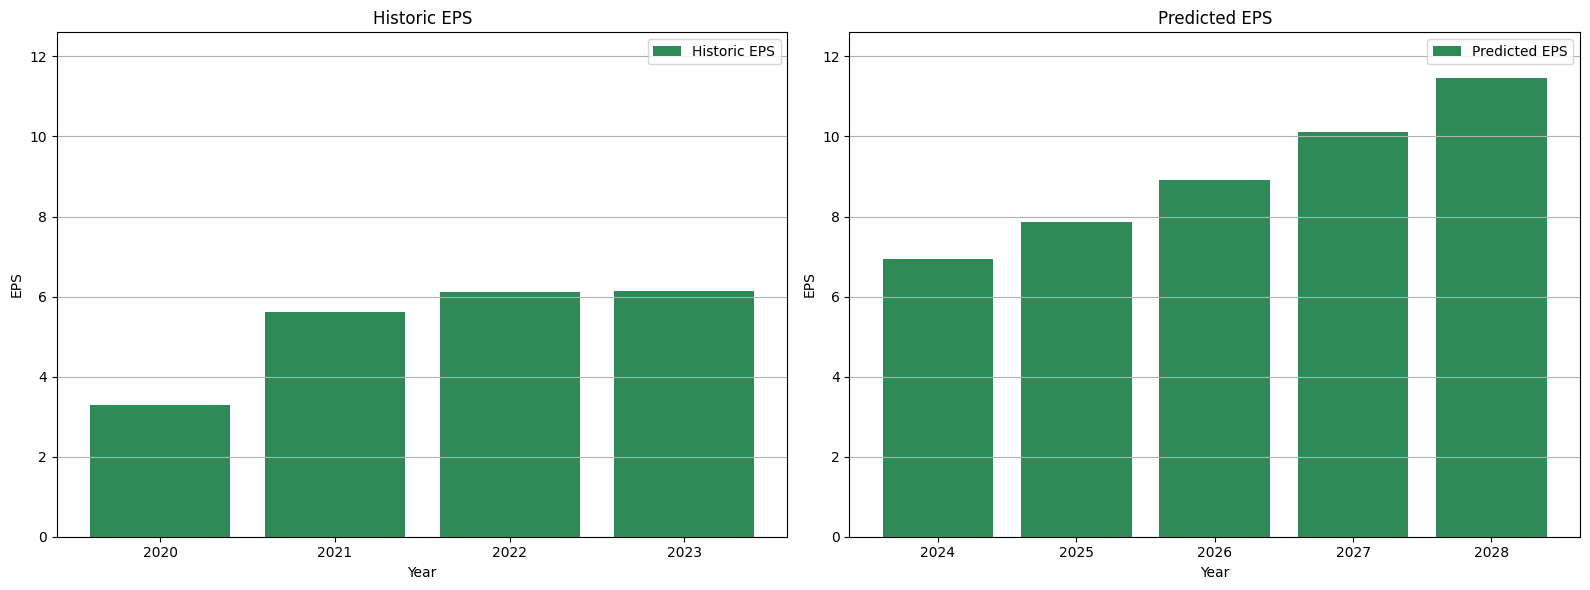

Latest closing price of AAPL: $169.89
 
Trailing PE ratio is: 26.46
Past EPS CAGR rate has been: 13.32%
 
Predicted EPS for the next 5 years:
Year 2024: EPS 6.95, with current PE the stock price is estimated to be $183.83
Year 2025: EPS 7.87, with current PE the stock price is estimated to be $208.32
Year 2026: EPS 8.92, with current PE the stock price is estimated to be $236.07
Year 2027: EPS 10.11, with current PE the stock price is estimated to be $267.52
Year 2028: EPS 11.46, with current PE the stock price is estimated to be $303.17
 
CAGR between current stock price and latest predicted value is: 12.28%
 
Trailing PS ratio is: 6.80
Revenue CAGR is: 6.90%
 
Predicted revenue for the next 5 years:
Year 2024: Revenue 409.7B
Year 2025: Revenue 438.0B
Year 2026: Revenue 468.3B
Year 2027: Revenue 500.6B
Year 2028: Revenue 535.2B


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ticker_symbol = 'AAPL'

# Import data (assuming company.income_stmt is defined)
company = yf.Ticker(ticker_symbol)
df = company.income_stmt
df_transposed = df.T
df = df_transposed[['Total Revenue', 'Diluted EPS', 'Net Income']]
df.index = df.index.astype(str)  # Convert index to string
df.index = pd.to_numeric(df.index.str.slice(0,4))  # Change index to year as integer
df = df.copy()  # Create a copy of the DataFrame
df.reset_index(inplace=True)
df.rename(columns={'index': 'Year'}, inplace=True)

# Transform data
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')
df['Diluted EPS'] = pd.to_numeric(df['Diluted EPS'], errors='coerce')
df['Net Income'] = pd.to_numeric(df['Net Income'], errors='coerce')
df = df.sort_values(by='Year')
df['Profit margin'] = df['Net Income'] / df['Total Revenue'] * 100

# Calculate the number of years for CAGR calculation
start_year = df['Year'].iloc[0]
end_year = df['Year'].iloc[-1]
years = end_year - start_year + 2

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the first graph (Total revenue, net income, and profit margin)
if df['Diluted EPS'].iloc[-1] > 0:  # If EPS is positive
    # Plot revenue bars for historical data
    axes[0].bar(df['Year'], df['Net Income'], label='Net Income')  # Net income bars first
    axes[0].bar(df['Year'], df['Total Revenue'] - df['Net Income'], bottom=df['Net Income'], color='darkblue', label='Total Revenue')  # Historical revenue bars
    axes[0].bar(df['Year'], df['Profit margin'], color='orange', alpha=0.5)  # Profit margin bars
    axes[0].set_title('Historical Revenue, Net Income, and Profit Margin')
else:  # If EPS is negative or zero
    axes[0].bar(df['Year'], df['Total Revenue'], color='#blue', label='Total Revenue')  # Revenue bars
    axes[0].set_title('Historical Revenue')

# Add value labels for profit margin
for i in range(len(df['Year'])):
    axes[0].text(df['Year'][i], df['Profit margin'][i] + 0.5, f"{df['Profit margin'][i]:.1f}%", ha='center')

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Revenue')
axes[0].legend()

# Plot predicted revenue for future years
future_years = np.arange(df['Year'].iloc[-1] + 1, df['Year'].iloc[-1] + 6)
pct_change_revenue = pct_change_revenue = (df['Total Revenue'].iloc[-1] / df['Total Revenue'].iloc[0]) ** (1 / len(df['Total Revenue'])) - 1
predicted_revenue = [df['Total Revenue'].iloc[-1] * (1 + pct_change_revenue) ** (year - df['Year'].iloc[-1]) for year in future_years]

# Plot the predicted revenue bar plot
axes[1].bar(future_years, predicted_revenue, color='darkblue', label='Predicted Revenue (Next 5 Years)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Revenue')
axes[1].set_title('Predicted Revenue')
axes[1].legend()

# Calculate the maximum revenue for setting y-axis limits
max_revenue = max(df['Total Revenue'].max(), max(predicted_revenue))

# Format y-axis ticks on both plots to display in billions
revenue_formatter = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x / 1e9) + 'B' if x >= 1e9 else '{:,.0f}'.format(x / 1e6) + 'M')
# Set y-axis limits and format y-axis ticks
for ax in axes:
    ax.yaxis.set_major_formatter(revenue_formatter)
    ax.set_ylim([0, max_revenue * 1.1])  # Set y-axis limit to 10% above the maximum revenue
    ax.grid(axis='y')  # Display only horizontal grid lines

# Set integer tick labels for x-axis
for ax in axes:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

# Plot EPS over years if EPS is positive
if df['Diluted EPS'].iloc[-1] > 0 and df['Diluted EPS'].iloc[0] > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create subplots for two bar plots
    ax1, ax2 = axes  # Axes for historic and predicted EPS

    # Plot historic EPS
    ax1.bar(df['Year'], df['Diluted EPS'], color='seagreen', label='Historic EPS')

    ax1.set_title('Historic EPS')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('EPS')
    ax1.legend()

    # Calculate CAGR
    start_eps = df['Diluted EPS'].iloc[0]
    end_eps = df['Diluted EPS'].iloc[-1]
    cagr = (end_eps / start_eps) ** (1 / years) - 1

    # Predict EPS for next 5 years using CAGR
    future_years = np.arange(end_year + 1, end_year + 6)
    predicted_eps = [end_eps * (1 + cagr) ** (year - end_year) for year in future_years]

    # Plot predicted EPS
    ax2.bar(future_years, predicted_eps, color='seagreen', label='Predicted EPS')

    ax2.set_title('Predicted EPS')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('EPS')
    ax2.legend()

    # Set the same y-axis level for both plots
    max_eps = max(df['Diluted EPS'].max(), max(predicted_eps))
    for ax in axes:
        ax.set_ylim([0, max_eps * 1.1])  # Set y-axis limit to 10% above the maximum EPS
        ax.grid(axis='y')  # Display only horizontal grid lines

    # Set integer tick labels for x-axis
    for ax in axes:
        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

stock_data = yf.Ticker('AAPL')
# Get latest closing price of the stock
latest_close_price = stock_data.history(period='1d')['Close'].iloc[-1]

# Get trailing P/E ratio of the stock (if EPS is positive)
pe_ratio = stock_data.info['trailingPE'] if df['Diluted EPS'].iloc[-1] > 0 else None

# Get trailing price-to-sales ratio from Yahoo Finance
price_to_sales_ratio = stock_data.info['priceToSalesTrailing12Months']

# Calculate historical EPS CAGR (if EPS is positive)
if df['Diluted EPS'].iloc[-1] > 0 and df['Diluted EPS'].iloc[0] > 0:
    start_eps = df['Diluted EPS'].iloc[0]
    end_eps = df['Diluted EPS'].iloc[-1]
    eps_cagr = (end_eps / start_eps) ** (1 / years) - 1
else:
    eps_cagr = None

# Calculate historical revenue CAGR
start_revenue = df['Total Revenue'].iloc[0]
end_revenue = df['Total Revenue'].iloc[-1]
revenue_cagr = (end_revenue / start_revenue) ** (1 / years) - 1

# Predict EPS for the next 5 years and estimate stock price based on current P/E ratio (if EPS is positive)
predicted_eps = [end_eps * (1 + eps_cagr) ** (year - end_year) for year in future_years] if eps_cagr else None

# Predict revenue for the next 5 years and estimate stock price based on current price-to-sales ratio
predicted_revenue = [end_revenue * (1 + revenue_cagr) ** (year - end_year) for year in future_years]

# Print EPS predictions and estimated stock prices (if EPS is positive)
print(f"Latest closing price of {'AAPL'}: ${latest_close_price:.2f}")
print(" ")
if predicted_eps:
    print(f"Trailing PE ratio is: {pe_ratio:.2f}")
    print(f"Past EPS CAGR rate has been: {eps_cagr:.2%}")
    print(" ")
    print("Predicted EPS for the next 5 years:")
    for year, eps in zip(future_years, predicted_eps):
        estimated_stock_price = eps * pe_ratio if pe_ratio else None
        if estimated_stock_price:
            print(f'Year {year}: EPS {eps:.2f}, with current PE the stock price is estimated to be ${estimated_stock_price:.2f}')
            latest_predicted_price = predicted_eps[-1] * pe_ratio
    growth_rate = (latest_predicted_price - latest_close_price) / latest_close_price
    cagr_stock_price = (1 + growth_rate) ** (1 / years) - 1
    print(" ")
    print(f"CAGR between current stock price and latest predicted value is: {cagr_stock_price:.2%}")
print(" ")

# Print revenue predictions and estimated stock prices
print(f"Trailing PS ratio is: {price_to_sales_ratio:.2f}")
print(f"Revenue CAGR is: {revenue_cagr:.2%}")
print(" ")
print("Predicted revenue for the next 5 years:")
for year, revenue in zip(future_years, predicted_revenue):
    estimated_stock_price = revenue / price_to_sales_ratio if price_to_sales_ratio else None
    if estimated_stock_price:
        print(f'Year {year}: Revenue {revenue / 1e9:.1f}B')


# Latest version with function

In [97]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_stock_analysis(ticker_symbol):

  # Import data (assuming company.income_stmt is defined)
  company = yf.Ticker(ticker_symbol)
  df = company.income_stmt
  df_transposed = df.T
  df = df_transposed[['Total Revenue', 'Diluted EPS', 'Net Income']]
  df.index = df.index.astype(str)  # Convert index to string
  df.index = pd.to_numeric(df.index.str.slice(0,4))  # Change index to year as integer
  df = df.copy()  # Create a copy of the DataFrame
  df.reset_index(inplace=True)
  df.rename(columns={'index': 'Year'}, inplace=True)

  # Transform data
  df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')
  df['Diluted EPS'] = pd.to_numeric(df['Diluted EPS'], errors='coerce')
  df['Net Income'] = pd.to_numeric(df['Net Income'], errors='coerce')
  df = df.sort_values(by='Year')
  df['Profit margin'] = df['Net Income'] / df['Total Revenue'] * 100

  # Calculate the number of years for CAGR calculation
  start_year = df['Year'].iloc[0]
  end_year = df['Year'].iloc[-1]
  years = end_year - start_year + 2

  # Set figure size
  fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

  # Plot the first graph (Total revenue, net income, and profit margin)
  if df['Diluted EPS'].iloc[-1] > 0:  # If EPS is positive
      # Plot revenue bars for historical data
      axes[0].bar(df['Year'], df['Net Income'], label='Net Income')  # Net income bars first
      axes[0].bar(df['Year'], df['Total Revenue'] - df['Net Income'], bottom=df['Net Income'], color='darkblue', label='Total Revenue')  # Historical revenue bars
      axes[0].bar(df['Year'], df['Profit margin'], color='orange', alpha=0.5)  # Profit margin bars
      axes[0].set_title('Historical Revenue, Net Income, and Profit Margin')
  else:  # If EPS is negative or zero
      axes[0].bar(df['Year'], df['Total Revenue'], color='blue', label='Total Revenue')  # Revenue bars
      axes[0].set_title('Historical Revenue')

  # Add value labels for profit margin
  for i in range(len(df['Year'])):
      axes[0].text(df['Year'][i], df['Profit margin'][i] + 0.5, f"{df['Profit margin'][i]:.1f}%", ha='center')

  axes[0].set_xlabel('Year')
  axes[0].set_ylabel('Revenue')
  axes[0].legend()

  # Plot predicted revenue for future years
  future_years = np.arange(df['Year'].iloc[-1] + 1, df['Year'].iloc[-1] + 6)
  pct_change_revenue = pct_change_revenue = (df['Total Revenue'].iloc[-1] / df['Total Revenue'].iloc[0]) ** (1 / len(df['Total Revenue'])) - 1
  predicted_revenue = [df['Total Revenue'].iloc[-1] * (1 + pct_change_revenue) ** (year - df['Year'].iloc[-1]) for year in future_years]

  # Plot the predicted revenue bar plot
  axes[1].bar(future_years, predicted_revenue, color='darkblue', label='Predicted Revenue (Next 5 Years)')
  axes[1].set_xlabel('Year')
  axes[1].set_ylabel('Revenue')
  axes[1].set_title('Predicted Revenue')
  axes[1].legend()

  # Calculate the maximum revenue for setting y-axis limits
  max_revenue = max(df['Total Revenue'].max(), max(predicted_revenue))

  # Format y-axis ticks on both plots to display in billions
  revenue_formatter = ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x / 1e9) + 'B' if x >= 1e9 else '{:,.0f}'.format(x / 1e6) + 'M')
  # Set y-axis limits and format y-axis ticks
  for ax in axes:
      ax.yaxis.set_major_formatter(revenue_formatter)
      ax.set_ylim([0, max_revenue * 1.1])  # Set y-axis limit to 10% above the maximum revenue
      ax.grid(axis='y')  # Display only horizontal grid lines

  # Set integer tick labels for x-axis
  for ax in axes:
      ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

  plt.tight_layout()
  plt.show()

  # Plot EPS over years if EPS is positive
  if df['Diluted EPS'].iloc[-1] > 0 and df['Diluted EPS'].iloc[0] > 0:
      fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create subplots for two bar plots
      ax1, ax2 = axes  # Axes for historic and predicted EPS

      # Plot historic EPS
      ax1.bar(df['Year'], df['Diluted EPS'], color='seagreen', label='Historic EPS')

      ax1.set_title('Historic EPS')
      ax1.set_xlabel('Year')
      ax1.set_ylabel('EPS')
      ax1.legend()

      # Calculate CAGR
      start_eps = df['Diluted EPS'].iloc[0]
      end_eps = df['Diluted EPS'].iloc[-1]
      cagr = (end_eps / start_eps) ** (1 / years) - 1

      # Predict EPS for next 5 years using CAGR
      future_years = np.arange(end_year + 1, end_year + 6)
      predicted_eps = [end_eps * (1 + cagr) ** (year - end_year) for year in future_years]

      # Plot predicted EPS
      ax2.bar(future_years, predicted_eps, color='seagreen', label='Predicted EPS')

      ax2.set_title('Predicted EPS')
      ax2.set_xlabel('Year')
      ax2.set_ylabel('EPS')
      ax2.legend()

      # Set the same y-axis level for both plots
      max_eps = max(df['Diluted EPS'].max(), max(predicted_eps))
      for ax in axes:
          ax.set_ylim([0, max_eps * 1.1])  # Set y-axis limit to 10% above the maximum EPS
          ax.grid(axis='y')  # Display only horizontal grid lines

      # Set integer tick labels for x-axis
      for ax in axes:
          ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

      plt.tight_layout()
      plt.show()

  stock_data = yf.Ticker(ticker_symbol)
  # Get latest closing price of the stock
  latest_close_price = stock_data.history(period='1d')['Close'].iloc[-1]

  # Get trailing P/E ratio of the stock (if EPS is positive)
  pe_ratio = stock_data.info['trailingPE'] if df['Diluted EPS'].iloc[-1] > 0 else None

  # Get trailing price-to-sales ratio from Yahoo Finance
  price_to_sales_ratio = stock_data.info['priceToSalesTrailing12Months']

  # Calculate historical EPS CAGR (if EPS is positive)
  if df['Diluted EPS'].iloc[-1] > 0 and df['Diluted EPS'].iloc[0] > 0:
      start_eps = df['Diluted EPS'].iloc[0]
      end_eps = df['Diluted EPS'].iloc[-1]
      eps_cagr = (end_eps / start_eps) ** (1 / years) - 1
  else:
      eps_cagr = None

  # Calculate historical revenue CAGR
  start_revenue = df['Total Revenue'].iloc[0]
  end_revenue = df['Total Revenue'].iloc[-1]
  revenue_cagr = (end_revenue / start_revenue) ** (1 / years) - 1

  # Predict EPS for the next 5 years and estimate stock price based on current P/E ratio (if EPS is positive)
  predicted_eps = [end_eps * (1 + eps_cagr) ** (year - end_year) for year in future_years] if eps_cagr else None

  # Predict revenue for the next 5 years and estimate stock price based on current price-to-sales ratio
  predicted_revenue = [end_revenue * (1 + revenue_cagr) ** (year - end_year) for year in future_years]

  # Print EPS predictions and estimated stock prices (if EPS is positive)
  print(f"Latest closing price of {ticker_symbol}: ${latest_close_price:.2f}")
  print(" ")
  if predicted_eps:
      print(f"Trailing PE ratio is: {pe_ratio:.2f}")
      print(f"Past EPS CAGR rate has been: {eps_cagr:.2%}")
      print(" ")
      print("Predicted EPS for the next 5 years:")
      for year, eps in zip(future_years, predicted_eps):
          estimated_stock_price = eps * pe_ratio if pe_ratio else None
          if estimated_stock_price:
              print(f'Year {year}: EPS {eps:.2f}, with current PE the stock price is estimated to be ${estimated_stock_price:.2f}')
              latest_predicted_price = predicted_eps[-1] * pe_ratio
      growth_rate = (latest_predicted_price - latest_close_price) / latest_close_price
      cagr_stock_price = (1 + growth_rate) ** (1 / years) - 1
      print(" ")
      print(f"CAGR between current stock price and latest predicted value is: {cagr_stock_price:.2%}")
  print(" ")

  # Print revenue predictions and estimated stock prices
  print(f"Trailing PS ratio is: {price_to_sales_ratio:.2f}")
  print(f"Revenue CAGR is: {revenue_cagr:.2%}")
  print(" ")
  print("Predicted revenue for the next 5 years:")
  for year, revenue in zip(future_years, predicted_revenue):
      estimated_stock_price = revenue / price_to_sales_ratio if price_to_sales_ratio else None
      if estimated_stock_price:
          print(f'Year {year}: Revenue {revenue / 1e9:.1f}B')


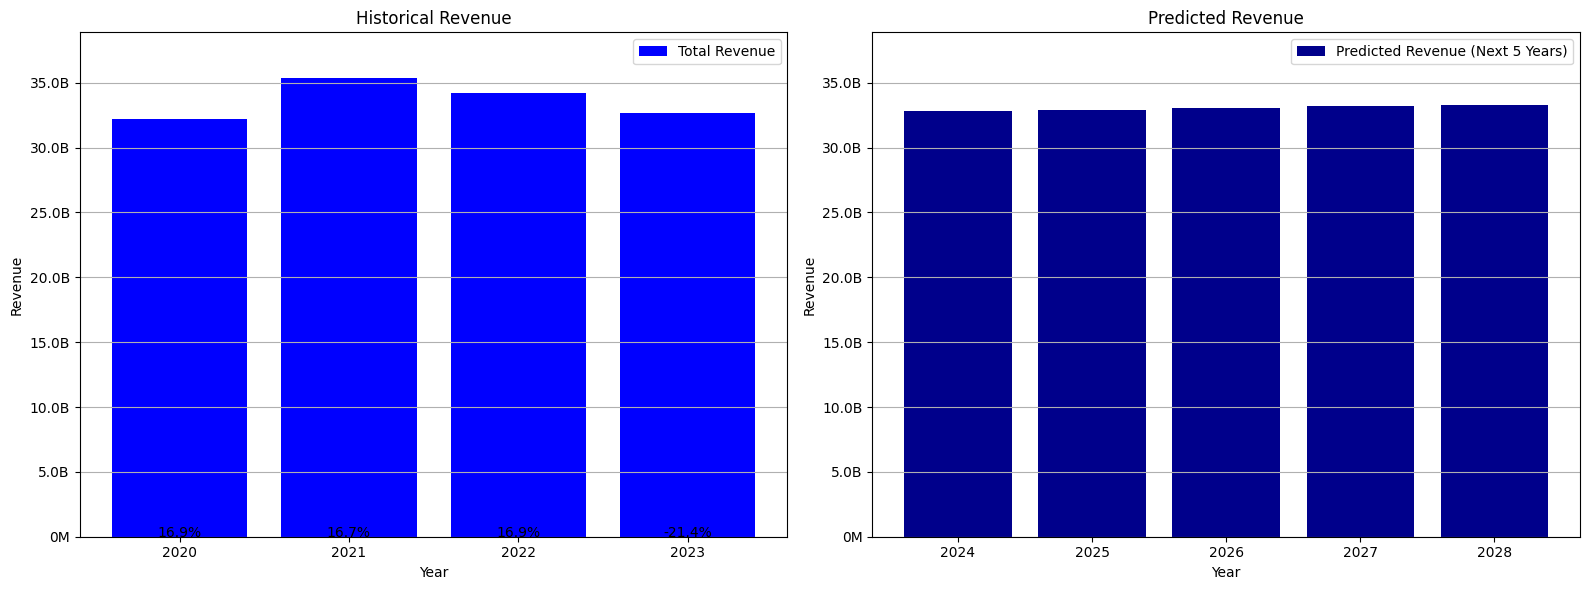

Latest closing price of MMM: $91.41
 
 
Trailing PS ratio is: 1.55
Revenue CAGR is: 0.31%
 
Predicted revenue for the next 5 years:
Year 2024: Revenue 32.8B
Year 2025: Revenue 32.9B
Year 2026: Revenue 33.0B
Year 2027: Revenue 33.1B
Year 2028: Revenue 33.2B


In [99]:
plot_stock_analysis('MMM') # Stock with positive eps

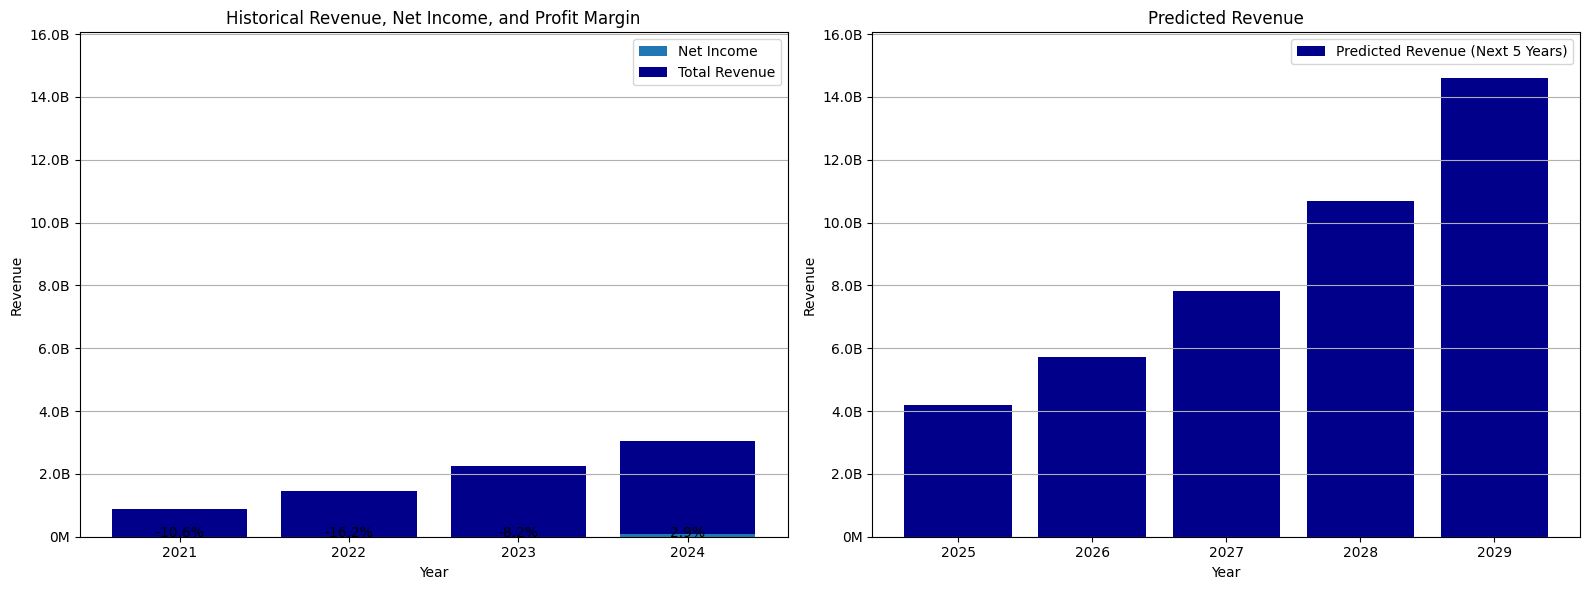

Latest closing price of CRWD: $298.02
 
 
Trailing PS ratio is: 23.59
Revenue CAGR is: 28.43%
 
Predicted revenue for the next 5 years:
Year 2025: Revenue 3.9B
Year 2026: Revenue 5.0B
Year 2027: Revenue 6.5B
Year 2028: Revenue 8.3B
Year 2029: Revenue 10.7B


In [87]:
plot_stock_analysis('CRWD') # Stock with negative eps